In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack

In [32]:
d = np.linspace(1.5,25.5,25)
fx = np.linspace(0.0, 1.0/(2.0*0.999/1000), 1000/2)

fy = np.zeros(1000)

m = np.zeros(25)
s = np.zeros(25)

se = pd.DataFrame()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [38]:
for i in range(25):
    se.join(pd.read_csv('Sharp '+str(15 + 10*i)+'mm/anag2.csv', header=None, squeeze = True))
    #m[i] = se.mean()
    #s[i] = se.std()
    #se.plot.kde(figsize=(16,8), xlim=(0.25,2.8))
    #fy = fy + scipy.fftpack.fft(se.values)

In [36]:
se.describe()

ValueError: Cannot describe a DataFrame without columns

## Estimación de la densidad de kernel de cada uno de los puntos probados

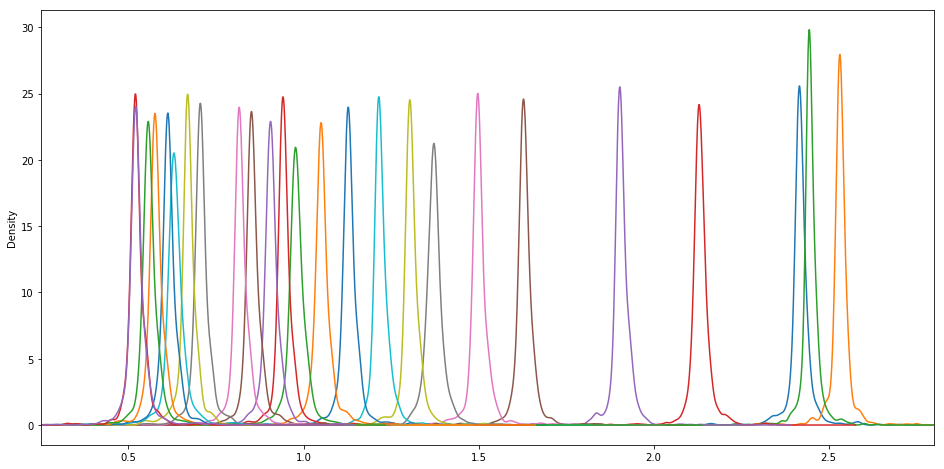

In [31]:
for i in range(25):
    se = pd.read_csv('Sharp '+str(15 + 10*i)+'mm/anag2.csv', header=None, squeeze = True)
    m[i] = se.mean()
    s[i] = se.std()
    se.plot.kde(figsize=(16,8), xlim=(0.25,2.8))
    fy = fy + scipy.fftpack.fft(se.values)

In [29]:
se.describe()

count    1000.000000
mean        0.524978
std         0.036198
min         0.222222
25%         0.514042
50%         0.521368
75%         0.531136
max         0.837607
Name: 0, dtype: float64

## Curva característica del sensor

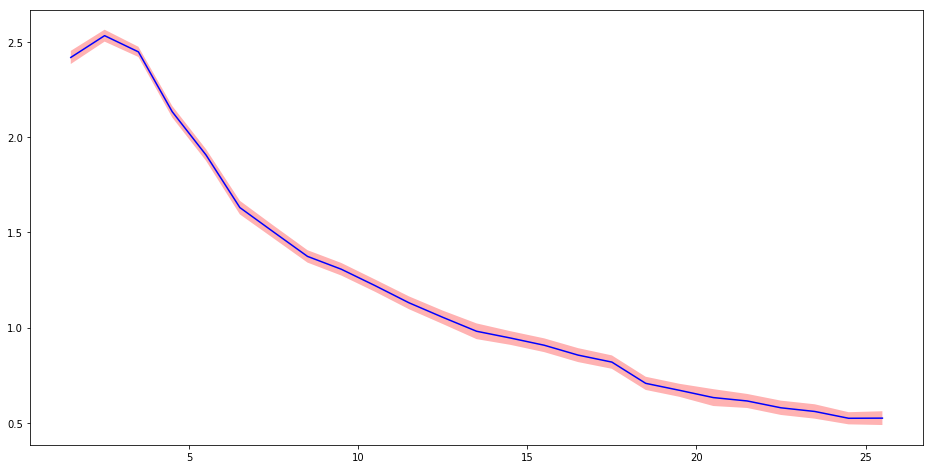

In [20]:
plt.figure(figsize=(16,8))
plt.plot(d, m, c='b', alpha = 1)
plt.fill_between(d, m-s, m+s, facecolor='r', alpha = 0.3)

## Densidad espectral del ruido

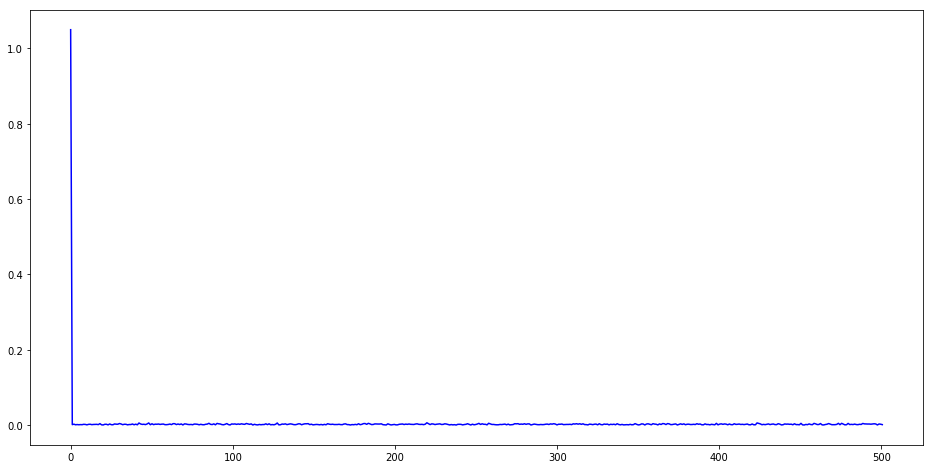

In [21]:
fy = scipy.fftpack.fft(se.values)
plt.figure(figsize=(16,8))
plt.plot(fx, 2.0/1000 * np.abs(fy[:1000//2]), c='b', alpha = 1)

## Estimación de la densidad de kernel de un único punto

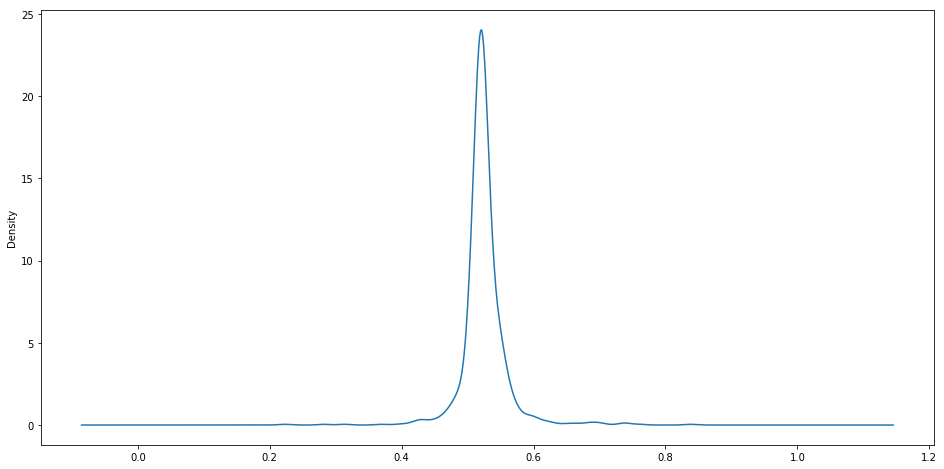

In [22]:
se.plot.kde(figsize=(16,8))